<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/Sarang_Manohar_Data_mining_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [120]:
raw_data = pd.read_csv(r'insurance_part2_data.csv')
raw_data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [121]:
raw_data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [122]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [123]:
raw_data.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [124]:
for x in ['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel','Duration', 'Sales', 'Product Name', 'Destination']:
    print(x.upper(),':',raw_data[x].nunique())
    print(raw_data[x].value_counts())
    print('\n')

AGE : 70
36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


AGENCY_CODE : 4
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


TYPE : 2
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


CLAIMED : 2
No     2076
Yes     924
Name: Claimed, dtype: int64


COMMISION : 324
0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


CHANNEL : 2
Online     2954
Offline      46
Name: Channel, dtype: int64


DURATION : 257
 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


SALES : 380
20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00   

In [125]:
raw_data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


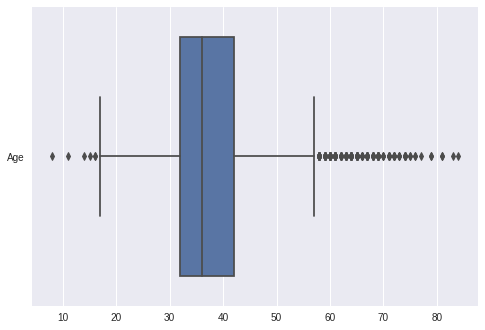

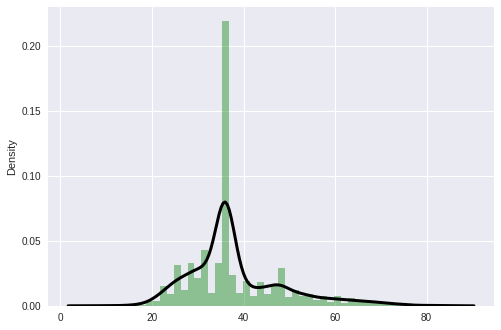

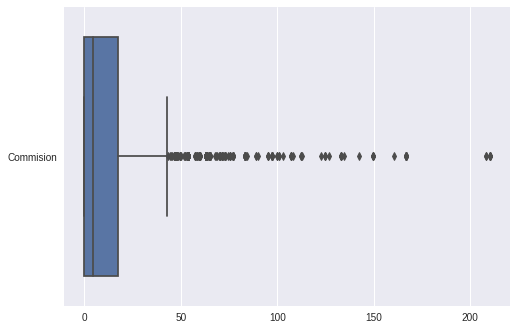

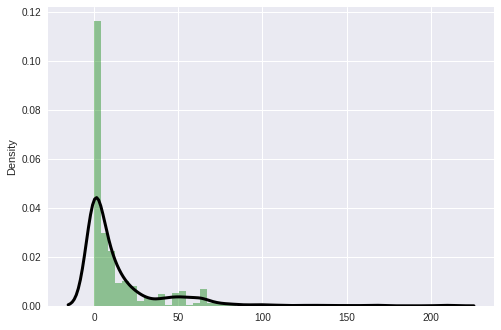

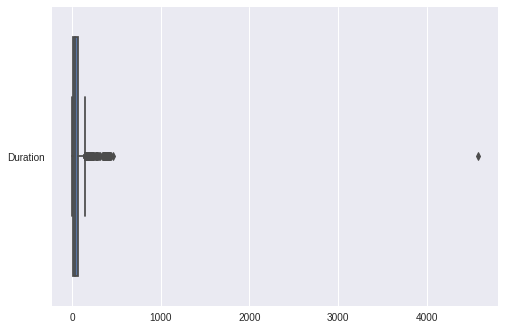

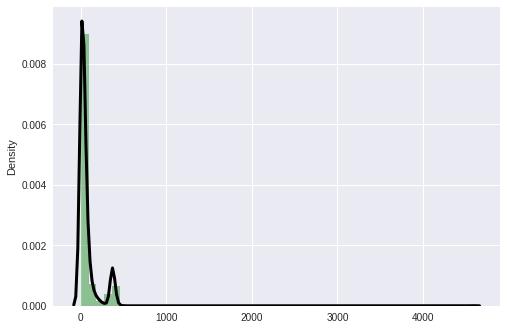

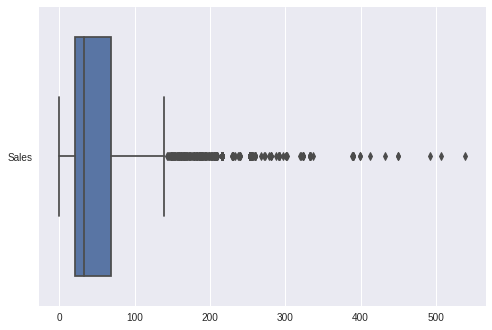

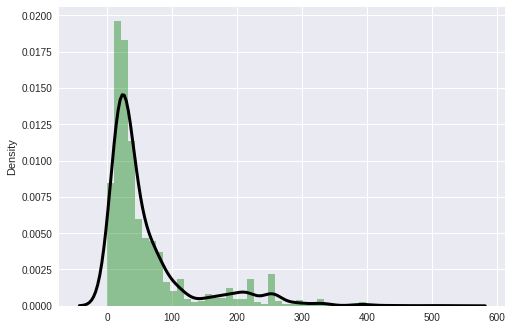

In [126]:
sns.boxplot(data=raw_data[{'Age'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Age'}],hist_kws = {'color':'g', 'label':'Age'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Commision'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Commision'}],hist_kws = {'color':'g', 'label':'Commision'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Duration'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Duration'}],hist_kws = {'color':'g', 'label':'Duration'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()
sns.boxplot(data=raw_data[{'Sales'}],orient='h')
plt.show()
sns.distplot(raw_data[{'Sales'}],hist_kws = {'color':'g', 'label':'Sales'},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
plt.show()

In [127]:
outlier = []
for x in ['Age','Commision','Duration','Sales']:
    q1, q3 = np.percentile(raw_data[x],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for y in raw_data[x]:
        if y<lower_bound:
            outlier.append(raw_data[x])
        elif y>upper_bound:
            outlier.append(raw_data[x])
    #print(outlier)
    print('Percent of outliers for ',x,'is',len(outlier)/3000)

Percent of outliers for  Age is 0.068
Percent of outliers for  Commision is 0.18866666666666668
Percent of outliers for  Duration is 0.316
Percent of outliers for  Sales is 0.43366666666666664


In [128]:
raw_data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [129]:
raw_data[raw_data.Age<18]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
480,17,C2B,Airlines,No,20.38,Online,21,81.5,Silver Plan,ASIA
1064,17,C2B,Airlines,Yes,51.75,Online,64,207.0,Gold Plan,ASIA
1273,14,CWT,Travel Agency,Yes,10.50,Offline,31,30.0,Customised Plan,ASIA
1558,8,CWT,Travel Agency,No,9.57,Offline,50,29.0,Customised Plan,ASIA
1673,16,C2B,Airlines,Yes,54.00,Online,373,216.0,Silver Plan,ASIA
1940,15,CWT,Travel Agency,No,10.50,Offline,53,30.0,Customised Plan,ASIA
1962,17,C2B,Airlines,Yes,5.00,Online,9,20.0,Bronze Plan,ASIA
2724,11,C2B,Airlines,No,15.75,Online,27,63.0,Silver Plan,ASIA
2987,16,C2B,Airlines,Yes,15.00,Online,15,60.0,Bronze Plan,ASIA


In [130]:
raw_data[raw_data.Duration<1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [131]:
raw_data.Duration.mean()

70.00133333333333

In [132]:
raw_data.Duration.median()

26.5

In [133]:
raw_data[raw_data.duplicated()==True]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [134]:
raw_data.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [135]:
for feature in raw_data.columns: 
    if raw_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(raw_data[feature].unique()))
        print(pd.Categorical(raw_data[feature].unique()).codes)
        raw_data[feature] = pd.Categorical(raw_data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [136]:
raw_data.sample(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
284,33,0,0,1,54.00,1,365,216.0,4,0
766,36,2,1,0,0.00,1,7,0.0,1,0
2454,31,0,0,0,58.35,1,380,233.4,4,0
201,28,1,1,0,0.00,0,367,97.0,2,1
724,64,0,0,1,6.75,1,11,27.0,0,0
2065,36,2,1,0,0.00,1,3,20.0,2,0
2496,30,0,0,1,17.38,1,22,69.5,0,0
2503,62,3,0,0,9.10,1,195,26.0,0,0
2597,31,1,1,1,29.70,1,10,49.5,2,0
1943,74,2,1,0,0.00,1,39,10.0,1,0


In [137]:
raw_data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [138]:
X = raw_data.drop(['Claimed'], axis=1)
y = raw_data.pop('Claimed')

In [139]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [140]:
train_labels.value_counts(normalize=True)

0    0.700476
1    0.299524
Name: Claimed, dtype: float64

In [141]:
test_labels.value_counts(normalize=True)

0    0.672222
1    0.327778
Name: Claimed, dtype: float64

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, train_labels)

In [142]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [143]:
np.random.randint(0, len(raw_data))

1032

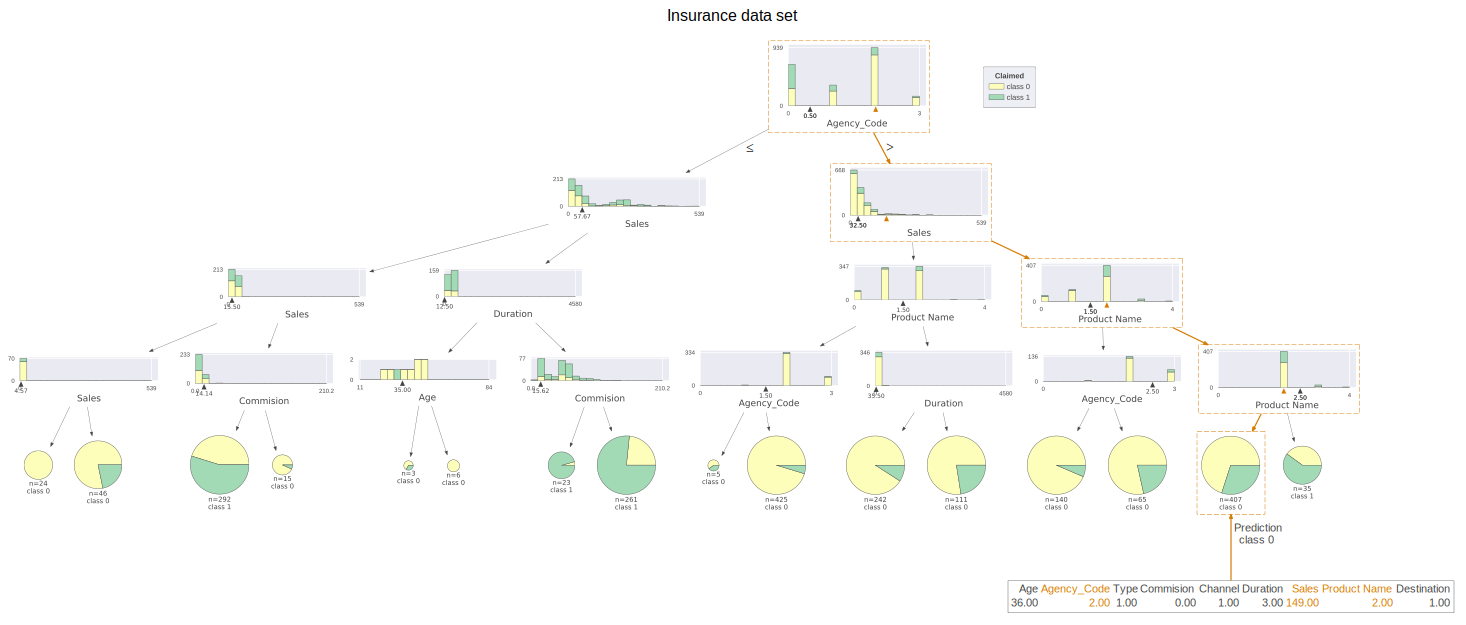

In [144]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=4, criterion='gini')

dt.fit(X_train, train_labels)

X = raw_data.loc[np.random.randint(0, len(raw_data))]

viz = dtreeviz(dt,
               X_train,
               train_labels,
               target_name='Claimed',  # this name will be displayed at the leaf node
               feature_names=raw_data.columns,
               title="Insurance data set",
               fontname="Arial",
               title_fontsize=16,
               colors = {"title":"black"},
               X=X
              )
viz
# viz.view() will give give a popup with graph in pdf

In [145]:
dt.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

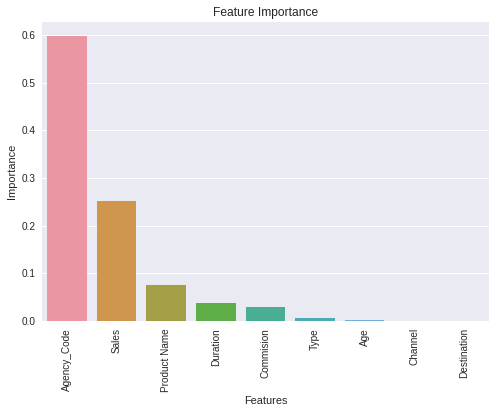

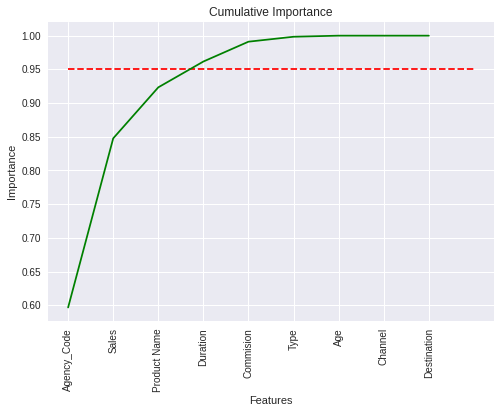

In [146]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [147]:
dt_param_grid = {
    'max_depth' : [6],
    'min_samples_leaf' : [15],
    'min_samples_split' : [50]
}
dt_ht = DecisionTreeClassifier(criterion='gini')
dt_gs = GridSearchCV(estimator=dt_ht, param_grid=dt_param_grid, cv = 3)
dt_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6], 'min_samples_leaf': [15],
         

In [148]:
print(dt_gs.best_params_)
best_dt = dt_gs.best_estimator_
ytrain_predict = best_dt.predict(X_train)
ytest_predict = best_dt.predict(X_test)

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}


In [149]:
#{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 40}
#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

[[1271  200]
 [ 222  407]]
0.799047619047619
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [150]:
#{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 60}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



###### Best set of hyper parameters with accuracy score difference of ***2%*** between train and test data is 

---
**{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}**


In [151]:
#{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [152]:
#{'max_depth': 6, 'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [153]:
#{'min_samples_split': 50}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [154]:
#{'min_samples_split': 30}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
0.799047619047619
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
0.7788888888888889
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [155]:
#{'min_samples_split': 10}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(best_dt.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(best_dt.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
0.799047619047619
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
0.7788888888888889
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [156]:
#{'min_samples_split': 5}
#Train data Confusion Matrix
print('Decision tree stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Decision tree stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_dt.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Decision tree stats on train data:
[[1271  200]
 [ 222  407]]
Accuracy score : 79.9 percent
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1471
           1       0.67      0.65      0.66       629

    accuracy                           0.80      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.80      0.80      0.80      2100



Decision tree stats on test data:
[[540  65]
 [134 161]]
Accuracy score : 77.9 percent
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.55      0.62       295

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



Area under ROC : 84.9 percent
Best Threshold=0.312883, G-Mean=0.767


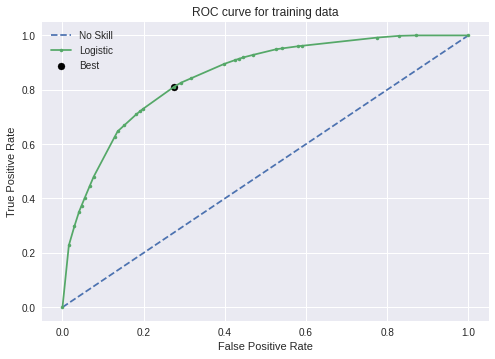

In [157]:
train_prob = best_dt.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 79.7 percent
Best Threshold=0.270270, G-Mean=0.736


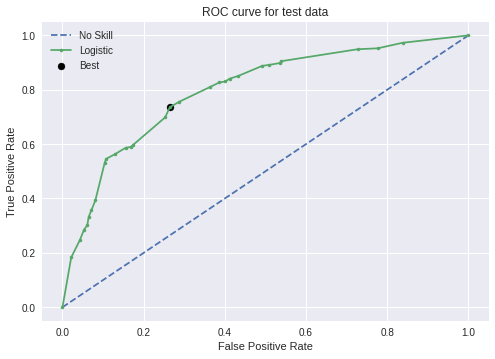

In [158]:
test_prob = best_dt.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

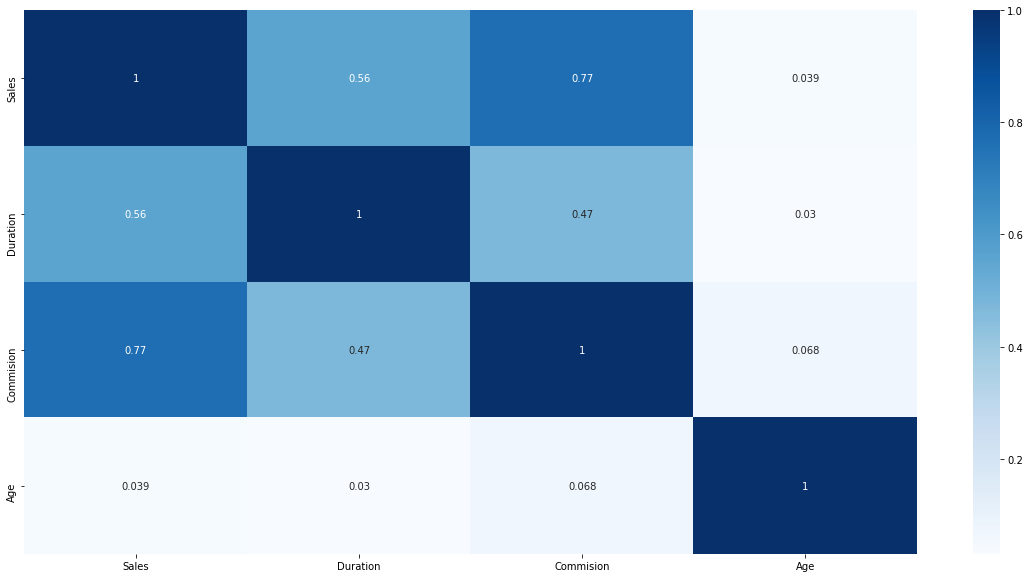

In [ ]:
corr = raw_data[{'Age','Commision','Duration','Sales'}].corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()

### Random Forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

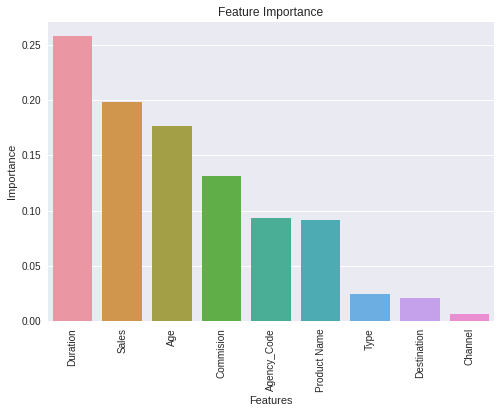

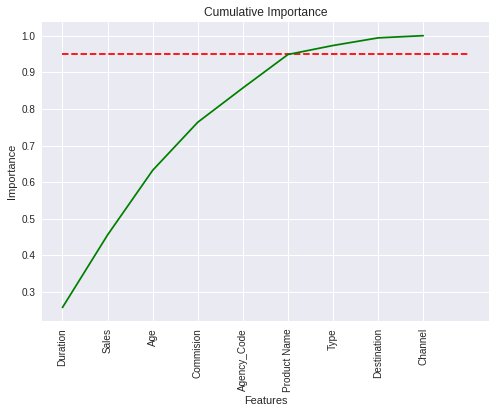

In [92]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X_train.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

In [ ]:
rf_param_grid = {
    #'max_depth' : [6],
    #'min_samples_leaf' : [10,15,20,30],
    'min_samples_split' : [50],
    'max_features' : [3],
    'n_estimators' : [100]
}

In [ ]:
rf_ht = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_ht, param_grid=rf_param_grid, cv = 3)
rf_gs.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
ytrain_predict = best_rf.predict(X_train)
ytest_predict = best_rf.predict(X_test)

{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}


###### Best set of hyper parameters with accuracy score difference of ***~5.5%*** and with better precision and recall for class 1 between train and test data is 

---
**{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}**

In [ ]:
#{'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1349  122]
 [ 243  386]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.61      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[554  51]
 [155 140]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [ ]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1349  122]
 [ 243  386]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.61      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[554  51]
 [155 140]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [ ]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1349  122]
 [ 243  386]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.61      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[554  51]
 [155 140]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [ ]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1349  122]
 [ 243  386]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.61      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[554  51]
 [155 140]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [ ]:
#{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 300}
#Train data Confusion Matrix
print('Random Forest stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_train,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Random Forest stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_rf.score(X_test,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Random Forest stats on train data:
[[1349  122]
 [ 243  386]]
Accuracy score : 82.6 percent
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.61      0.68       629

    accuracy                           0.83      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.83      0.82      2100



Random Forest stats on test data:
[[554  51]
 [155 140]]
Accuracy score : 77.1 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



Area under ROC : 89.0 percent
Best Threshold=0.318445, G-Mean=0.808


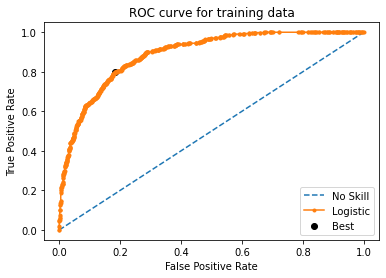

In [ ]:
train_prob = best_rf.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 82.4 percent
Best Threshold=0.322711, G-Mean=0.760


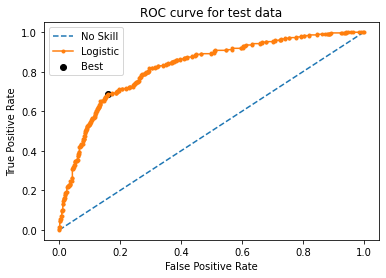

In [ ]:
test_prob = best_rf.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()

In [103]:
raw_data1 = pd.read_csv(r'insurance_part2_data.csv')

In [104]:
for feature in raw_data1.columns: 
    if raw_data1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(raw_data1[feature].unique()))
        print(pd.Categorical(raw_data1[feature].unique()).codes)
        raw_data1[feature] = pd.Categorical(raw_data1[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [105]:
raw_data1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [106]:
ss = StandardScaler()

X = raw_data1.drop(['Claimed'], axis=1)
y = raw_data1.pop('Claimed')

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [107]:
nn = MLPClassifier()
nn.fit(X_train_s, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0.5, 1.0, 'Loss curve')

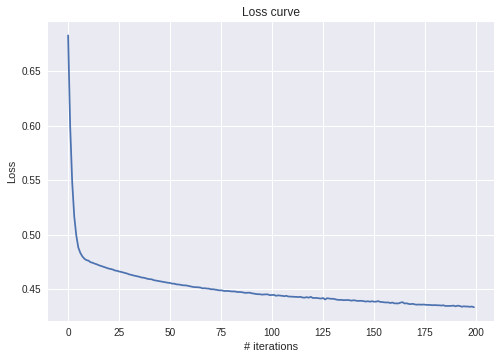

In [118]:
plt.plot(nn.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('# iterations')
plt.title('Loss curve')

In [117]:
nn.n_iter_

200

In [ ]:
nn_param_grid = {
    'hidden_layer_sizes' : [250],
    'activation' : ['relu'],
    'solver' : ['adam'],
    'max_iter' : [10000],
    'tol' : [0.0001],
    'verbose' : [True],
    'random_state' : [1]
}

In [ ]:
nn_ht = MLPClassifier()
nn_gs = GridSearchCV(estimator=nn_ht, param_grid=nn_param_grid, cv = 3)
nn_gs.fit(X_train_s, train_labels)

print(nn_gs.best_params_)

best_nn = nn_gs.best_estimator_
ytrain_predict = best_nn.predict(X_train_s)
ytest_predict = best_nn.predict(X_test_s)

Iteration 1, loss = 0.65672495
Iteration 2, loss = 0.58126258
Iteration 3, loss = 0.53463028
Iteration 4, loss = 0.51061530
Iteration 5, loss = 0.49654767
Iteration 6, loss = 0.48867746
Iteration 7, loss = 0.48560037
Iteration 8, loss = 0.48312476
Iteration 9, loss = 0.48129555
Iteration 10, loss = 0.48024385
Iteration 11, loss = 0.47905317
Iteration 12, loss = 0.47778701
Iteration 13, loss = 0.47665643
Iteration 14, loss = 0.47555748
Iteration 15, loss = 0.47483012
Iteration 16, loss = 0.47384578
Iteration 17, loss = 0.47273064
Iteration 18, loss = 0.47189788
Iteration 19, loss = 0.47114586
Iteration 20, loss = 0.47041138
Iteration 21, loss = 0.46957504
Iteration 22, loss = 0.46885855
Iteration 23, loss = 0.46790214
Iteration 24, loss = 0.46754084
Iteration 25, loss = 0.46652943
Iteration 26, loss = 0.46600672
Iteration 27, loss = 0.46521694
Iteration 28, loss = 0.46430177
Iteration 29, loss = 0.46380798
Iteration 30, loss = 0.46299020
Iteration 31, loss = 0.46231075
Iteration 32, los

In [ ]:
print(best_nn)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)


In [ ]:
#{'activation': 'relu', 'hidden_layer_sizes': 150, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1302  169]
 [ 230  399]]
Accuracy score : 81.0 percent
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1471
           1       0.70      0.63      0.67       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



Artificial Neural Network stats on test data:
[[540  65]
 [146 149]]
Accuracy score : 76.6 percent
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       605
           1       0.70      0.51      0.59       295

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [ ]:
#{'activation': 'relu', 'hidden_layer_sizes': 300, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1344  127]
 [ 256  373]]
Accuracy score : 81.8 percent
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1471
           1       0.75      0.59      0.66       629

    accuracy                           0.82      2100
   macro avg       0.79      0.75      0.77      2100
weighted avg       0.81      0.82      0.81      2100



Artificial Neural Network stats on test data:
[[555  50]
 [161 134]]
Accuracy score : 76.6 percent
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.45      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



**{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}**

In [ ]:

#{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 10000, 'random_state': 1, 'solver': 'adam', 'tol': 0.0001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1318  153]
 [ 240  389]]
Accuracy score : 81.3 percent
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1471
           1       0.72      0.62      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.81      0.81      0.81      2100



Artificial Neural Network stats on test data:
[[546  59]
 [151 144]]
Accuracy score : 76.7 percent
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [ ]:
#{'activation': 'relu', 'hidden_layer_sizes': 100, 'max_iter': 10000, 'solver': 'adam', 'tol': 0.001, 'verbose': True}
#Train data Confusion Matrix
print('Artificial Neural Network stats on train data:')
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_train_s,train_labels)*100) )
print(classification_report(train_labels, ytrain_predict))
print('\n')
#Test data Confusion Matrix
print('Artificial Neural Network stats on test data:')
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print('Accuracy score : %.1f percent' % (best_nn.score(X_test_s,test_labels)*100) )
print(classification_report(test_labels, ytest_predict))

Artificial Neural Network stats on train data:
[[1326  145]
 [ 310  319]]
Accuracy score : 78.3 percent
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.51      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Artificial Neural Network stats on test data:
[[560  45]
 [169 126]]
Accuracy score : 76.2 percent
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       605
           1       0.74      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.76      0.76      0.74       900



Area under ROC : 86.6 percent
Best Threshold=0.302837, G-Mean=0.795


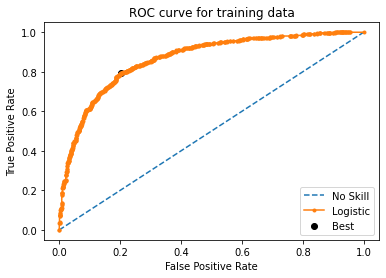

In [ ]:
train_prob = best_nn.predict_proba(X_train_s)[:,1]
train_auc = roc_auc_score(train_labels, train_prob)
print('Area under ROC : %.1f percent' % (train_auc*100) )
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for training data')
plt.legend()
# show the plot
plt.show()

Area under ROC : 81.0 percent
Best Threshold=0.235478, G-Mean=0.753


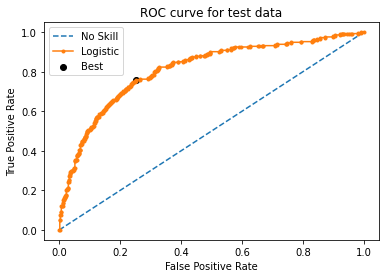

In [ ]:
test_prob = best_nn.predict_proba(X_test_s)[:,1]
test_auc = roc_auc_score(test_labels, test_prob)
print('Area under ROC : %.1f percent' % (test_auc*100) )
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.legend()
# show the plot
plt.show()